In [1]:
import graphviz
from tabulate import tabulate 
from IPython.display import display, Image

In [2]:
class NFA:
    def __init__(self, states, alphabet, transitions, start_state, accept_states):
        self.states = states
        self.alphabet = alphabet
        self.transitions = transitions
        self.start_state = start_state
        self.accept_states = accept_states

    def is_accepting(self, state):
        return state in self.accept_states

    def process_input(self, input_string):
        current_states = {self.start_state}
        for symbol in input_string:
            next_states = set()
            for state in current_states:
                next_states.update(self.transitions.get((state, symbol), set()))
            current_states = next_states
        return any(self.is_accepting(state) for state in current_states)

    def generate_state_table(self):
        headers = ['State'] + list(self.alphabet) + ['Accepting']
        rows = []

        for state in self.states:
            row = [state]
            for symbol in self.alphabet:
                next_states = self.transitions.get((state, symbol), set())
                row.append(', '.join(sorted(next_states)))
            row.append('Yes' if self.is_accepting(state) else 'No')
            rows.append(row)

        return tabulate(rows, headers=headers, tablefmt='grid')

In [3]:
def visualize_nfa(nfa):
    dot = graphviz.Digraph('NFA', format='png')
    dot.attr(rankdir='LR')

    for state in nfa.states:
        dot.node(state, shape='circle', color='black' if state in nfa.accept_states else 'white')

    for transition, next_states in nfa.transitions.items():
        for next_state in next_states:
            dot.edge(transition[0], next_state, label=transition[1])

    dot.render('nfa', format='png', cleanup=True)
    file_path = "nfa"
    png_file_path = f"{file_path}.png"
    display(Image(filename=png_file_path))

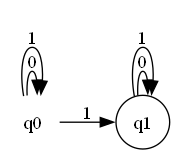


State Table:
+---------+--------+-----+-------------+
| State   | 1      | 0   | Accepting   |
+=========+========+=====+=============+
| q1      | q1     | q1  | Yes         |
+---------+--------+-----+-------------+
| q0      | q0, q1 | q0  | No          |
+---------+--------+-----+-------------+
The DFA rejects the input string 'aaab'


In [4]:
# Example NFA for the language of strings ending with 'ab'
states = {'q0', 'q1'}
alphabet = {'0', '1'}
transitions = {
        ('q0', '0'): {'q0'},
        ('q0', '1'): {'q0', 'q1'},
        ('q1', '0'): {'q1'},
        ('q1', '1'): {'q1'},
    }
start_state = 'q0'
accept_states = {'q1'}
nfa_example = NFA(states, alphabet, transitions, start_state, accept_states)

# Visualize the NFA
visualize_nfa(nfa_example)

# Generate and print the state table
state_table = nfa_example.generate_state_table()
print("\nState Table:")
print(state_table)
input_string = 'aaab'
result = nfa_example.process_input(input_string)
print(f"The DFA {'accepts' if result else 'rejects'} the input string '{input_string}'")